### Count DICOM Files with XRayTubeCurrent Below 80

In [2]:
import os
import pydicom

# Define the main directory
main_dir = r"C:\Reza Gonabadi\Polimi\Master Thesis\LIDC-IDRI_Simplified"

# Initialize counters
total_slices_under_80 = 0
subjects_with_slices_under_80 = 0

# Loop through each subfolder
for subfolder in os.listdir(main_dir):
    subfolder_path = os.path.join(main_dir, subfolder)
    
    # Check if it is a directory
    if os.path.isdir(subfolder_path):
        # Get a list of .dcm files in the subfolder
        dicom_files = [f for f in os.listdir(subfolder_path) if f.endswith('.dcm')]
        
        slice_count_under_80 = 0
        
        for dicom_file in dicom_files:
            dicom_path = os.path.join(subfolder_path, dicom_file)
            try:
                ds = pydicom.dcmread(dicom_path)
                # Check the XRayTubeCurrent field
                if hasattr(ds, "XRayTubeCurrent") and (ds.XRayTubeCurrent <= 80):
                    slice_count_under_80 += 1
                    total_slices_under_80 += 1
            except Exception as e:
                print(f"Error reading DICOM file in {subfolder}: {e}")
        
        if slice_count_under_80 > 0:
            subjects_with_slices_under_80 += 1
            print(f"Subject {subfolder} has {slice_count_under_80} slices with XRayTubeCurrent < 80.")

# Print the total count
print(f"Total number of slices with XRayTubeCurrent < 80: {total_slices_under_80}")
print(f"Total number of subjects with at least one slice with XRayTubeCurrent < 80: {subjects_with_slices_under_80}")


Subject LIDC-IDRI-0098 has 45 slices with XRayTubeCurrent < 80.
Subject LIDC-IDRI-0101 has 32 slices with XRayTubeCurrent < 80.
Subject LIDC-IDRI-0151 has 17 slices with XRayTubeCurrent < 80.


KeyboardInterrupt: 

### Filter and Transfer DICOM Folders with XRayTubeCurrent Below 80

In [ ]:
import os
import shutil
import pydicom

# Define the main directories
source_dir = r"C:\Reza Gonabadi\Polimi\Master Thesis\LIDC-IDRI_Simplified"
target_dir = r"C:\Reza Gonabadi\Polimi\Master Thesis\LIDC-IDRI_Simplified_under80"
delete_dir = r"C:\Reza Gonabadi\Polimi\Master Thesis\LIDC-IDRI_Simplified_low"

# Create the target directory if it doesn't exist
os.makedirs(target_dir, exist_ok=True)

# Initialize a counter
count_under_80 = 0

# Loop through each subfolder
for subfolder in os.listdir(source_dir):
    subfolder_path = os.path.join(source_dir, subfolder)
    
    # Check if it is a directory
    if os.path.isdir(subfolder_path):
        # Get a list of .dcm files in the subfolder
        dicom_files = [f for f in os.listdir(subfolder_path) if f.endswith('.dcm')]
        
        if dicom_files:
            # Read the first DICOM file
            first_dicom_path = os.path.join(subfolder_path, dicom_files[0])
            try:
                ds = pydicom.dcmread(first_dicom_path)
                # Check the XRayTubeCurrent field
                if hasattr(ds, "XRayTubeCurrent") and ds.XRayTubeCurrent <= 80:
                    print(f"Subfolder {subfolder} has an XRayTubeCurrent < 80 in the first slice.")
                    
                    # Copy the folder to the target directory
                    shutil.copytree(subfolder_path, os.path.join(target_dir, subfolder))
                    
                    # Delete the folder from the delete directory
                    delete_folder_path = os.path.join(delete_dir, subfolder)
                    if os.path.exists(delete_folder_path):
                        shutil.rmtree(delete_folder_path)
                        print(f"Deleted {delete_folder_path}")
                    
                    count_under_80 += 1
            except Exception as e:
                print(f"Error reading DICOM file in {subfolder}: {e}")

# Print the total count
print(f"Total number of subjects with XRayTubeCurrent < 80: {count_under_80}")


Subfolder LIDC-IDRI-0218 has an XRayTubeCurrent < 80 in the first slice.
Subfolder LIDC-IDRI-0262 has an XRayTubeCurrent < 80 in the first slice.
Subfolder LIDC-IDRI-0291 has an XRayTubeCurrent < 80 in the first slice.
Subfolder LIDC-IDRI-0293 has an XRayTubeCurrent < 80 in the first slice.
Subfolder LIDC-IDRI-0294 has an XRayTubeCurrent < 80 in the first slice.
Error reading DICOM file in LIDC-IDRI-0294: [WinError 183] Cannot create a file when that file already exists: 'C:\\Reza Gonabadi\\Polimi\\Master Thesis\\LIDC-IDRI_Simplified_under80\\LIDC-IDRI-0294'
Subfolder LIDC-IDRI-0295 has an XRayTubeCurrent < 80 in the first slice.
Subfolder LIDC-IDRI-0297 has an XRayTubeCurrent < 80 in the first slice.
Error reading DICOM file in LIDC-IDRI-0297: [WinError 183] Cannot create a file when that file already exists: 'C:\\Reza Gonabadi\\Polimi\\Master Thesis\\LIDC-IDRI_Simplified_under80\\LIDC-IDRI-0297'
Subfolder LIDC-IDRI-0304 has an XRayTubeCurrent < 80 in the first slice.
Error reading DI

### Move DICOM Folders with XRayTubeCurrent Below 80

In [4]:
import os
import shutil
import pydicom

# Define the main directories
source_dir = r"C:\Reza Gonabadi\Polimi\Master Thesis\LIDC-IDRI_Simplified"
target_dir = r"C:\Reza Gonabadi\Polimi\Master Thesis\LIDC-IDRI_Simplified_low_asus"

# Create the target directory if it doesn't exist
os.makedirs(target_dir, exist_ok=True)

# Initialize a counter
count_under_80 = 0

# Loop through each subfolder
for subfolder in os.listdir(source_dir):
    subfolder_path = os.path.join(source_dir, subfolder)
    target_folder_path = os.path.join(target_dir, subfolder)
    
    # Check if it is a directory
    if os.path.isdir(subfolder_path):
        # Skip if the folder already exists in the target directory
        if os.path.exists(target_folder_path):
            print(f"Skipping {subfolder} as it already exists in the target directory.")
            continue
        
        # Get a list of .dcm files in the subfolder
        dicom_files = [f for f in os.listdir(subfolder_path) if f.endswith('.dcm')]
        
        if dicom_files:
            # Read the first DICOM file
            first_dicom_path = os.path.join(subfolder_path, dicom_files[0])
            try:
                ds = pydicom.dcmread(first_dicom_path)
                # Check the XRayTubeCurrent field
                if hasattr(ds, "XRayTubeCurrent") and ds.XRayTubeCurrent <= 80:
                    print(f"Subfolder {subfolder} has an XRayTubeCurrent < 80 in the first slice.")
                    
                    # Copy the folder to the target directory
                    shutil.copytree(subfolder_path, target_folder_path)
                    print(f"Copied {subfolder} to the target directory.")
                    
                    # Delete the folder from the source directory
                    shutil.rmtree(subfolder_path)
                    print(f"Deleted from source directory: {subfolder_path}")
                    
                    count_under_80 += 1
            except Exception as e:
                print(f"Error processing {subfolder}: {e}")

# Print the total count
print(f"Total number of subjects with XRayTubeCurrent < 80: {count_under_80}")


Skipping LIDC-IDRI-0001 as it already exists in the target directory.
Skipping LIDC-IDRI-0002 as it already exists in the target directory.
Skipping LIDC-IDRI-0003 as it already exists in the target directory.
Skipping LIDC-IDRI-0004 as it already exists in the target directory.
Skipping LIDC-IDRI-0005 as it already exists in the target directory.
Skipping LIDC-IDRI-0006 as it already exists in the target directory.
Skipping LIDC-IDRI-0007 as it already exists in the target directory.
Skipping LIDC-IDRI-0008 as it already exists in the target directory.
Skipping LIDC-IDRI-0009 as it already exists in the target directory.
Skipping LIDC-IDRI-0010 as it already exists in the target directory.
Skipping LIDC-IDRI-0011 as it already exists in the target directory.
Skipping LIDC-IDRI-0012 as it already exists in the target directory.
Skipping LIDC-IDRI-0013 as it already exists in the target directory.
Skipping LIDC-IDRI-0014 as it already exists in the target directory.
Skipping LIDC-IDRI-0

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import find_contours
import pylidc as pl
from pylidc.utils import consensus
import nrrd
import csv

import numpy as np

# Compatibility layer for np.int
if not hasattr(np, 'int'):
    np.int = int

# Function to stack DICOM files into a volume
def stack_dicom_files(directory):
    import pydicom
    dicom_files = [os.path.join(directory, filename) for filename in os.listdir(directory) if filename.endswith('.dcm')]
    dicom_files.sort(key=lambda x: pydicom.dcmread(x).ImagePositionPatient[2])
    first_dicom = pydicom.dcmread(dicom_files[0])
    shape = (first_dicom.Rows, first_dicom.Columns, len(dicom_files))
    ct_volume = np.empty(shape, dtype=first_dicom.pixel_array.dtype)
    for i, dicom_file in enumerate(dicom_files):
        dicom_data = pydicom.dcmread(dicom_file)
        ct_volume[:, :, i] = dicom_data.pixel_array
    return ct_volume

# Directories
main_directory = r"C:\Reza Gonabadi\Polimi\Master Thesis\LIDC-IDRI_Simplified_low_asus"
output_directory = r"C:\Reza Gonabadi\Polimi\Master Thesis\LIDC-IDRI_Simplified_low_asus_Output"

# Ensure the output directory exists
os.makedirs(output_directory, exist_ok=True)

# Initialize metadata storage for all subjects
all_metadata = []

# Malignancy labels
malignancy_labels = ['Unknown', 'Highly Unlikely', 'Moderately Unlikely', 'Ambiguous', 'Moderately Suspicious', 'Highly Suspicious']

# Iterate through each subject directory
for subject_folder in os.listdir(main_directory):
    subject_directory = os.path.join(main_directory, subject_folder)
    
    # Skip if it's not a directory
    if not os.path.isdir(subject_directory):
        continue
    
    # Extract patient ID
    patient_id = subject_folder
    print(f"Processing patient: {patient_id}")
    
    # Load DICOM volume
    try:
        ct_volume = stack_dicom_files(subject_directory)
    except Exception as e:
        print(f"Skipping {patient_id} due to error: {e}")
        continue
    
    # Query scan and annotations
    scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == patient_id).first()
    if not scan:
        print(f"No scan found for {patient_id}")
        continue
    
    nodules = scan.cluster_annotations()

    # Ensure there are nodules
    if not nodules:
        print(f"No nodules found for {patient_id}")
        continue

    # Process each nodule
    for nodule_index, anns in enumerate(nodules):
        num_annotations = len(anns)

        if num_annotations > 1:
            # Calculate consensus mask and bounding box
            cmask, cbbox, masks = consensus(anns, clevel=0.5, pad=[(20, 20), (20, 20), (0, 0)])
        else:
            # Use the single annotation mask directly
            cmask = anns[0].boolean_mask(pad=[(20, 20), (20, 20), (0, 0)])
            cbbox = anns[0].bbox(pad=[(20, 20), (20, 20), (0, 0)])
            masks = [cmask]

        # Save consensus mask as .nrrd
        consensus_nrrd_path = os.path.join(output_directory, f"{patient_id}_nodule_{nodule_index + 1}_consensus.nrrd")
        nrrd.write(consensus_nrrd_path, cmask.astype(np.uint8))


        # Compute average malignancy score
        avg_malignancy = sum(ann.malignancy for ann in anns) / len(anns)
        malignancy_status = "Malignant" if avg_malignancy >= 4 else "Benign"

        # Add consensus mask metadata
        all_metadata.append({
            "Patient_ID": patient_id,
            "Nodule_ID": nodule_index + 1,
            "Mask": consensus_nrrd_path,
            "Image": os.path.join(output_directory, f"{patient_id}_nodule_{nodule_index + 1}_ct_volume.nrrd"),
            "Mean": np.mean(ct_volume[cbbox][cmask]),
            "Std": np.std(ct_volume[cbbox][cmask]),
            "Max": np.max(ct_volume[cbbox][cmask]),
            "Min": np.min(ct_volume[cbbox][cmask]),
            #"Malignancy": malignancy_labels[anns[0].malignancy]  # Assuming malignancy is consistent across annotations
            "Malignancy": malignancy_status
        })

        # Extract and save individual annotation masks
        for annotation_index, annotation in enumerate(anns):
            individual_mask = annotation.boolean_mask(pad=[(20, 20), (20, 20), (0, 0)])
            mask_nrrd_path = os.path.join(output_directory, f"{patient_id}_nodule_{nodule_index + 1}_annotation_{annotation_index + 1}.nrrd")
            nrrd.write(mask_nrrd_path, individual_mask.astype(np.uint8))

            # Add individual annotation mask metadata
            all_metadata.append({
                "Patient_ID": patient_id,
                "Nodule_ID": nodule_index + 1,
                "Mask": mask_nrrd_path,
                "Image": os.path.join(output_directory, f"{patient_id}_nodule_{nodule_index + 1}_ct_volume.nrrd"),
                "Mean": "",  # Optional: Add individual mask statistics if needed
                "Std": "",
                "Max": "",
                "Min": "",
                "Malignancy": malignancy_labels[annotation.malignancy]
            })

        # Extract the CT volume for the nodule using the bounding box
        ct_nodule_volume = ct_volume[cbbox]

        # Save the nodule CT volume
        ct_nodule_nrrd_path = os.path.join(output_directory, f"{patient_id}_nodule_{nodule_index + 1}_ct_volume.nrrd")
        nrrd.write(ct_nodule_nrrd_path, ct_nodule_volume)

# Write all metadata to a CSV file
metadata_csv_path = os.path.join(output_directory, "all_nodules_metadata.csv")
with open(metadata_csv_path, 'w', newline='') as csvfile:
    fieldnames = ["Patient_ID", "Nodule_ID", "Mask", "Image", "Mean", "Std", "Max", "Min", "Malignancy"]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for entry in all_metadata:
        writer.writerow(entry)

print(f"Metadata saved to {metadata_csv_path}")

Processing patient: LIDC-IDRI-0001
Processing patient: LIDC-IDRI-0002
Processing patient: LIDC-IDRI-0003
Processing patient: LIDC-IDRI-0004
Processing patient: LIDC-IDRI-0005
Processing patient: LIDC-IDRI-0006
Processing patient: LIDC-IDRI-0007
Processing patient: LIDC-IDRI-0008
Processing patient: LIDC-IDRI-0009
Processing patient: LIDC-IDRI-0010
Processing patient: LIDC-IDRI-0011
Processing patient: LIDC-IDRI-0012
Processing patient: LIDC-IDRI-0013
Processing patient: LIDC-IDRI-0014
Processing patient: LIDC-IDRI-0015
Processing patient: LIDC-IDRI-0016
Processing patient: LIDC-IDRI-0017
Processing patient: LIDC-IDRI-0018
Processing patient: LIDC-IDRI-0019
Processing patient: LIDC-IDRI-0020
Processing patient: LIDC-IDRI-0021
Processing patient: LIDC-IDRI-0022
Processing patient: LIDC-IDRI-0023
Processing patient: LIDC-IDRI-0024
Processing patient: LIDC-IDRI-0025
Processing patient: LIDC-IDRI-0026
Processing patient: LIDC-IDRI-0027
Processing patient: LIDC-IDRI-0028
No nodules found for

In [3]:
# Use pyradiomics to extract features
pyradiomics_command = f"""
pyradiomics "{metadata_csv_path}" -o "{os.path.join(output_directory, 'all_radiomics_features.csv')}" -f csv --param "{os.path.join(output_directory, 'CT.yaml')}"
"""
print("Run the following command in your terminal to extract radiomics features:")
print(pyradiomics_command)

Run the following command in your terminal to extract radiomics features:

pyradiomics "C:\Reza Gonabadi\Polimi\Master Thesis\LIDC-IDRI_Simplified_under80_Output\all_nodules_metadata.csv" -o "C:\Reza Gonabadi\Polimi\Master Thesis\LIDC-IDRI_Simplified_under80_Output\all_radiomics_features.csv" -f csv --param "C:\Reza Gonabadi\Polimi\Master Thesis\LIDC-IDRI_Simplified_under80_Output\CT.yaml"



Found 9 .nrrd files for subject LIDC-IDRI-0294
Loading mask: LIDC-IDRI-0294_nodule_1_annotation_1.nrrd
Loading mask: LIDC-IDRI-0294_nodule_1_consensus.nrrd
Loading CT volume: LIDC-IDRI-0294_nodule_1_ct_volume.nrrd
Loading mask: LIDC-IDRI-0294_nodule_2_annotation_1.nrrd
Loading mask: LIDC-IDRI-0294_nodule_2_annotation_2.nrrd
Loading mask: LIDC-IDRI-0294_nodule_2_annotation_3.nrrd
Loading mask: LIDC-IDRI-0294_nodule_2_annotation_4.nrrd
Loading mask: LIDC-IDRI-0294_nodule_2_consensus.nrrd
Loading CT volume: LIDC-IDRI-0294_nodule_2_ct_volume.nrrd


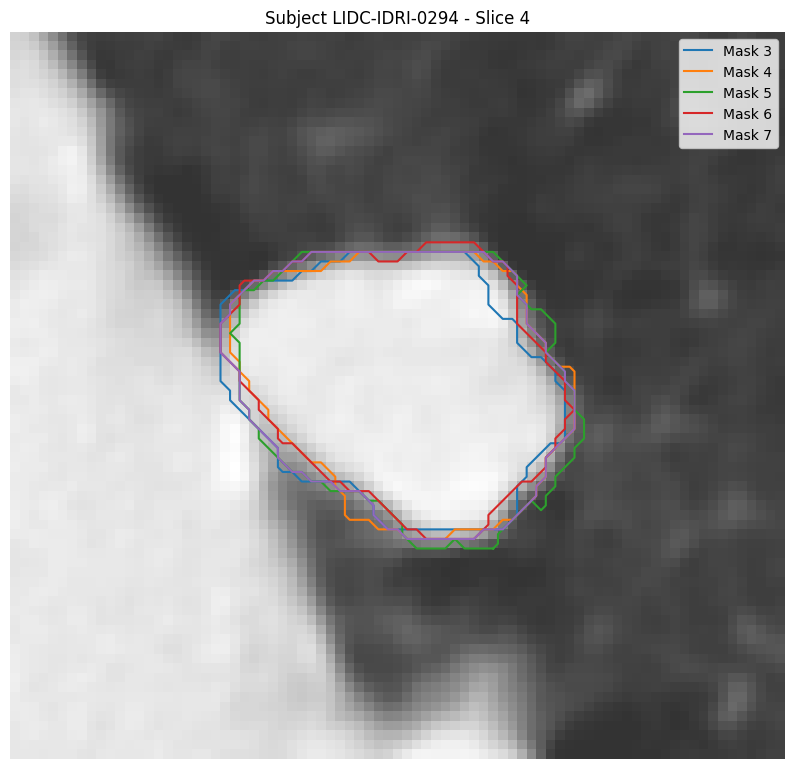

In [4]:
import os
import nrrd
import matplotlib.pyplot as plt
from skimage.measure import find_contours

# Path to the output folder where .nrrd files are saved
output_folder = r"C:\Reza Gonabadi\Polimi\Master Thesis\LIDC-IDRI_Simplified_under80_Output"

# Function to visualize slices with contours
def visualize_nrrd(ct_volume, masks, title_prefix):
    num_slices = ct_volume.shape[2]
    middle_slice = num_slices // 2  # Choose the middle slice for visualization
    
    plt.figure(figsize=(10, 10))
    plt.imshow(ct_volume[:, :, middle_slice], cmap="gray", alpha=0.8)
    
    # Plot contours for each mask
    for mask_index, mask in enumerate(masks):
        if middle_slice < mask.shape[2]:  # Ensure the slice index is within bounds
            for contour in find_contours(mask[:, :, middle_slice].astype(float), 0.5):
                plt.plot(contour[:, 1], contour[:, 0], label=f"Mask {mask_index + 1}")

    plt.title(f"{title_prefix} - Slice {middle_slice}")
    plt.legend()
    plt.axis("off")
    plt.show()

# Function to load and visualize all .nrrd files for a specific subject
def visualize_subject(subject_id):
    # Find all .nrrd files related to the subject
    subject_files = [f for f in os.listdir(output_folder) if subject_id in f and f.endswith('.nrrd')]
    
    if not subject_files:
        print(f"No .nrrd files found for subject {subject_id}")
        return

    print(f"Found {len(subject_files)} .nrrd files for subject {subject_id}")
    
    # Separate files into volumes and masks
    ct_volume = None
    masks = []
    
    for file in subject_files:
        file_path = os.path.join(output_folder, file)
        data, header = nrrd.read(file_path)
        
        # Identify the type of file based on its name
        if "ct_volume" in file:
            print(f"Loading CT volume: {file}")
            ct_volume = data
        elif "consensus" in file or "annotation" in file:
            print(f"Loading mask: {file}")
            masks.append(data)
        else:
            print(f"Unknown file type: {file}")
    
    # Ensure we have a CT volume and at least one mask
    if ct_volume is None:
        print("CT volume not found.")
        return
    
    if not masks:
        print("No masks found.")
        return
    
    # Visualize the CT volume and masks
    visualize_nrrd(ct_volume, masks, f"Subject {subject_id}")

# Specify the subject ID to visualize
subject_id = "LIDC-IDRI-0294"  # Replace with the desired subject ID
visualize_subject(subject_id)


In [7]:
# Write all metadata to a CSV file
metadata_csv_path = os.path.join(output_directory, "all_nodules_metadata.csv")
with open(metadata_csv_path, 'w', newline='') as csvfile:
    fieldnames = ["Patient_ID", "Nodule_ID", "Mask", "Image", "Mean", "Std", "Max", "Min", "Malignancy"]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for entry in all_metadata:
        writer.writerow(entry)

print(f"Metadata saved to {metadata_csv_path}")

ValueError: dict contains fields not in fieldnames: 'CT_Volume', 'Consensus_Mask'

In [11]:
import pylidc
print(pylidc.__file__)


c:\Users\Reza.Gonabadi\AppData\Local\Programs\Python\Python313\Lib\site-packages\pylidc\__init__.py


In [9]:
import os
import pandas as pd
import numpy as np
import nrrd
import cv2
from scipy.ndimage import binary_dilation, binary_erosion
from skimage.util import random_noise
from skimage.segmentation import slic
from skimage.draw import polygon
import pyradiomics
from radiomics import featureextractor, getFeatureClasses
import SimpleITK as sitk
import csv

# --------------------------- Data Augmentation --------------------------- #

# Load the metadata file
metadata_path = "C:/Reza Gonabadi/Polimi/Master Thesis/LIDC-IDRI_Simplified_low_asus_Output/all_nodules_metadata.csv"
df = pd.read_csv(metadata_path)

# Filter relevant masks (Consensus + Moderately/Highly Suspicious)
target_classes = ["Moderately Suspicious", "Highly Suspicious"]
filtered_df = df[(df['Mask'].str.contains('consensus')) & (df['Malignancy'].isin(target_classes))]

# Target balance (aim for 1600 samples)
current_count = len(filtered_df)
target_count = 1600
augmentation_factor = target_count // current_count if current_count > 0 else 1

print(f"Current count: {current_count}, Target count: {target_count}, Augmentation factor: {augmentation_factor}")

# Function to perform augmentations
def augment_mask(mask):
    augmented_masks = []
    
    # Dilation with factor 0.15
    iterations = max(1, int(0.15 * mask.shape[0]))  # Ensure at least 1 iteration
    dilated = binary_dilation(mask, iterations=iterations).astype(mask.dtype)
    augmented_masks.append(dilated)
    
    # Erosion with factor 0.15
    eroded = binary_erosion(mask, iterations=iterations).astype(mask.dtype)
    augmented_masks.append(eroded)
    
    # Random Noise
    noisy = random_noise(mask, mode='s&p', amount=0.05)
    noisy = (noisy > 0.5).astype(mask.dtype)
    augmented_masks.append(noisy)
    
    # Contour Randomization using SLIC superpixels, repeated twice
    for _ in range(2):
        segments = slic(mask, n_segments=50, compactness=10, sigma=1, start_label=1)
        perturbed_mask = mask.copy()
        for segment in np.unique(segments):
            coords = np.column_stack(np.where(segments == segment))
            if np.random.rand() > 0.5:  # Randomly perturb some segments
                rr, cc = polygon(coords[:, 0], coords[:, 1], mask.shape)
                perturbed_mask[rr, cc] = np.random.choice([0, 1])
        augmented_masks.append(perturbed_mask)
    
    return augmented_masks

# Directory for augmented masks
output_dir = "C:/Reza Gonabadi/Polimi/Master Thesis/LIDC-IDRI_Simplified_low_asus_Output/Augmented"
os.makedirs(output_dir, exist_ok=True)

# ---------------------- Radiomic Feature Extraction ----------------------- #

# Initialize metadata storage for augmented masks
new_entries = []
radiomic_features = []

# Initialize Pyradiomics extractor with default settings or a custom YAML file
# Replace 'CT.yaml' with your specific parameter file if needed
extractor = featureextractor.RadiomicsFeatureExtractor()

# Optionally, enable all feature classes
# extractor.enableAllFeatures()

# Iterate through each mask and perform augmentations
for idx, row in filtered_df.iterrows():
    mask_path = row['Mask']
    patient_id, nodule_id = row['Patient_ID'], row['Nodule_ID']
    
    # Load NRRD mask
    try:
        mask, mask_header = nrrd.read(mask_path)
    except Exception as e:
        print(f"Error reading mask {mask_path}: {e}")
        continue
    
    # Apply augmentations
    augmented_masks = augment_mask(mask)
    
    # Load corresponding CT volume
    # Assuming CT volume path is derived from mask_path or metadata
    # Modify this part based on your actual CT volume storage
    ct_volume_path = row['Image']  # Ensure 'Image' column exists and points to the CT volume
    if not os.path.exists(ct_volume_path):
        print(f"CT volume not found for mask {mask_path}")
        continue
    
    # Read CT volume using SimpleITK
    try:
        ct_image = sitk.ReadImage(ct_volume_path)
        ct_array = sitk.GetArrayFromImage(ct_image)
    except Exception as e:
        print(f"Error reading CT volume {ct_volume_path}: {e}")
        continue
    
    # Iterate through augmented masks
    for i, aug_mask in enumerate(augmented_masks):
        # Save augmented mask
        new_filename = f"{patient_id}_nodule_{nodule_id}_aug_{i}.nrrd"
        save_mask_path = os.path.join(output_dir, new_filename)
        try:
            nrrd.write(save_mask_path, aug_mask.astype(np.uint8), mask_header)
        except Exception as e:
            print(f"Error saving augmented mask {save_mask_path}: {e}")
            continue
        
        # Add to new metadata entries
        new_entries.append({
            "Patient_ID": patient_id,
            "Nodule_ID": nodule_id,
            "Mask": save_mask_path,
            "Image": ct_volume_path,
            "Malignancy": row['Malignancy']
        })
        
        # Extract Radiomic Features
        try:
            # Ensure mask and CT are aligned
            # Convert numpy arrays back to SimpleITK images if necessary
            # Here, assuming that mask and CT are already aligned and in the same space
            # If not, additional alignment steps are required
            
            # Save augmented mask temporarily as SimpleITK image for Pyradiomics
            temp_mask_path = os.path.join(output_dir, f"temp_mask_{i}.nrrd")
            sitk.WriteImage(sitk.GetImageFromArray(aug_mask), temp_mask_path)
            
            # Extract features
            features = extractor.execute(ct_volume_path, temp_mask_path)
            
            # Remove temporary mask file
            os.remove(temp_mask_path)
            
            # Append features with identifier
            feature_dict = {
                "Patient_ID": patient_id,
                "Nodule_ID": nodule_id,
                "Augmentation": i,
                "Malignancy": row['Malignancy']
            }
            for key, value in features.items():
                feature_dict[key] = value
            radiomic_features.append(feature_dict)
            
        except Exception as e:
            print(f"Error extracting features for mask {save_mask_path}: {e}")
            continue

# Convert new entries to DataFrame and merge with original metadata
augmented_df = pd.DataFrame(new_entries)
df_final = pd.concat([df, augmented_df], ignore_index=True)

# Save updated metadata
updated_metadata_path = "C:/Reza Gonabadi/Polimi/Master Thesis/LIDC-IDRI_Simplified_low_asus_Output/all_nodules_metadata_augmented1.csv"
df_final = df_final[df_final['Malignancy'].isin(target_classes)]  # Ensure only target classes remain
df_final.to_csv(updated_metadata_path, index=False)

print(f"Augmentation complete. Saved {len(new_entries)} new masks.")

# Save Radiomic Features to CSV
radiomic_features_df = pd.DataFrame(radiomic_features)
radiomic_features_csv_path = os.path.join(output_dir, "all_radiomics_features_augmented.csv")
radiomic_features_df.to_csv(radiomic_features_csv_path, index=False)

print(f"Radiomic features saved to {radiomic_features_csv_path}")


ModuleNotFoundError: No module named 'pyradiomics'